# Example 4: Simulation of a wide FOV instrument

In [ ]:
#pip install EXOSpy==2.3

Processing...:   0%|                      | 5/5184 [00:00<02:04, 41.57it/s]

g factor used in this analysis =  0.0025557668983080544


Processing...:   0%|                      | 8/5184 [00:00<02:40, 32.25it/s]

g factor used in this analysis =  0.0025557668983080544


Processing...: 100%|███████████████████| 5184/5184 [02:28<00:00, 34.89it/s]


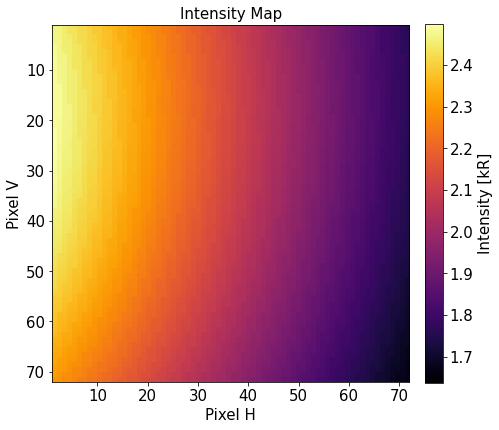

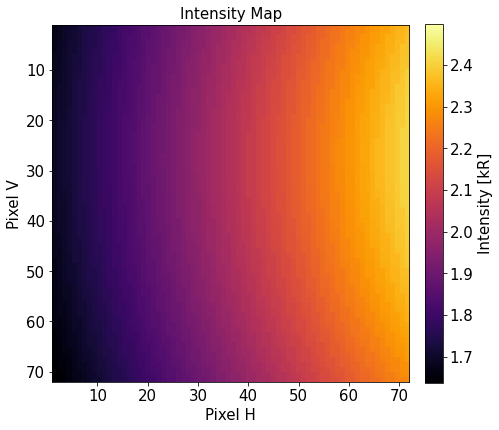

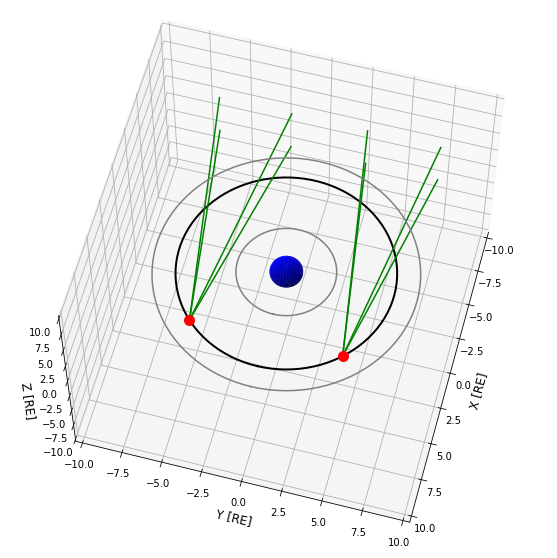

In [2]:
#------- EXAMPLE OPTICALLY THIN 1 ----------------------------------------------
import numpy.matlib
import matplotlib.pyplot as plt
import exospy.exospy as ep
import numpy as np


# Imager features
fov               = 18   # degrees 
pixangres         = 0.25 # 0.25 deg between pixels

# Solar Conditions
irradiance        = 0.008519 # <<<< FROM LISIRD COMPOSITE LY-ALPHA JAN,9 2015

#>>>> Generate LOS for IMAGER 1 <<<<
sat_pos1          = np.array([6.6*np.cos(45*np.pi/180),6.6*np.sin(45*np.pi/180),0])
target_pos1       = np.array([0,6.6*np.sin(45*np.pi/180),-0.15])
target_los1       = target_pos1 - sat_pos1
[r_los1, numpix]  = ep.generateLOSfromImager(fov,pixangres,target_los1)

# Generate POS for IMAGER 1
r_pos1      = np.matlib.repmat(sat_pos1,numpix*numpix,1)

# Estimate Intensity 
IntensityV1 = ep.generateIntensityOpticallyThin(irradiance, r_los1,r_pos1,'Z15MAX',dl = 0.05,maxRAD = 8, minRAD = 3)
IntensityV1 = np.reshape(IntensityV1,(numpix,numpix))

#>>>> Generate LOS for IMAGER 2 <<<<
sat_pos2          = np.array([6.6*np.cos(45*np.pi/180),-6.6*np.sin(45*np.pi/180),0])
target_pos2       = np.array([0,-6.6*np.sin(45*np.pi/180),-0.15])
target_los2       = target_pos2 - sat_pos2
[r_los2, numpix]  = ep.generateLOSfromImager(fov,pixangres,target_los2)

# Generate POS for IMAGER 2
r_pos2      = np.matlib.repmat(sat_pos2,numpix*numpix,1)

# Estimate Intensity 
IntensityV2 = ep.generateIntensityOpticallyThin(irradiance, r_los2,r_pos2,'Z15MAX',dl = 0.05,maxRAD = 8, minRAD = 3)
IntensityV2 = np.reshape(IntensityV2,(numpix,numpix))

# Calculating Max value to set colorbars
MaxVal = max(np.amax(IntensityV1),np.amax(IntensityV2))/1000 # in kR
MinVal = min(np.amin(IntensityV1),np.amin(IntensityV2))/1000 # in kR

# Plotting IMAGE 1
extent = 1,numpix,numpix,1
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(np.fliplr(IntensityV1)/1000,extent=extent,cmap = 'inferno',origin='lower',vmin=MinVal, vmax=MaxVal)
cb = fig.colorbar(im, fraction=0.046, pad=0.04)
cb.set_label('Intensity [kR]',fontsize = 15)
cb.ax.tick_params(labelsize=15)
ax.set_xlabel('Pixel H',fontsize=15)
ax.set_ylabel('Pixel V',fontsize=15)
ax.set_title('Intensity Map', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Plotting IMAGE 2
extent = 1,numpix,numpix,1
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(np.fliplr(IntensityV2)/1000,extent=extent,cmap = 'inferno',origin='lower',vmin=MinVal, vmax=MaxVal)
cb = fig.colorbar(im, fraction=0.046, pad=0.04)
cb.set_label('Intensity [kR]',fontsize = 15)
cb.ax.tick_params(labelsize=15)
ax.set_xlabel('Pixel H',fontsize=15)
ax.set_ylabel('Pixel V',fontsize=15)
ax.set_title('Intensity Map', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Generating Synthetic Satellite at 6.6 RE
theta = np.linspace(0,2*np.pi,100)
r_orb = 6.6
x_orb = r_orb*np.cos(theta)
y_orb = r_orb*np.sin(theta)
z_orb = np.zeros(len(x_orb))
# Plotting
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111,projection='3d')
## Plotting Earth at center
u   = np.linspace(0,2*np.pi,100)
v   = np.linspace(0,np.pi,100)
x = 1*np.outer(np.cos(u),np.sin(v))
y = 1*np.outer(np.sin(u),np.sin(v))
z = 1*np.outer(np.ones(np.size(u)),np.cos(v))
ax.plot_surface(x,y,z, rstride = 4, cstride = 4, color='b',zorder=-1)
## Plotting Orbit
ax.plot3D(x_orb,y_orb,z_orb,'k',linewidth = 2,zorder=-1)
## Labeling figure
ax.set_xlabel('X [RE]',fontsize=12)
ax.set_ylabel('Y [RE]',fontsize=12)
ax.set_zlabel('Z [RE]',fontsize=12)
## Setting limits in figure
ax.axes.set_xlim3d(left=-10, right=10) 
ax.axes.set_ylim3d(bottom=-10, top=10) 
ax.axes.set_zlim3d(bottom=-10, top=10) 
## Plotting Satellite Locations
ax.scatter3D(6.6*np.cos(45*np.pi/180),6.6*np.sin(45*np.pi/180),0,s=100,c='r',zorder = 20)
ax.scatter3D(6.6*np.cos(45*np.pi/180),-6.6*np.sin(45*np.pi/180),0,s=100,c='r',zorder = 20)
## Plotting FOV 1
new_point = sat_pos1+15*r_los1[0,:]
ax.plot3D([sat_pos1[0],new_point[0]],[sat_pos1[1],new_point[1]],[sat_pos1[2],new_point[2]],color= 'g',zorder = -1)
new_point = sat_pos1+15*r_los1[numpix-1,:]
ax.plot3D([sat_pos1[0],new_point[0]],[sat_pos1[1],new_point[1]],[sat_pos1[2],new_point[2]],color= 'g',zorder = -1)
new_point = sat_pos1+15*r_los1[numpix*numpix-1,:]
ax.plot3D([sat_pos1[0],new_point[0]],[sat_pos1[1],new_point[1]],[sat_pos1[2],new_point[2]],color= 'g',zorder = -1)
new_point = sat_pos1+15*r_los1[numpix*(numpix-1),:]
ax.plot3D([sat_pos1[0],new_point[0]],[sat_pos1[1],new_point[1]],[sat_pos1[2],new_point[2]],color= 'g',zorder = -1)
## Plotting FOV 2
new_point = sat_pos2+15*r_los2[0,:]
ax.plot3D([sat_pos2[0],new_point[0]],[sat_pos2[1],new_point[1]],[sat_pos2[2],new_point[2]],color= 'g',zorder = -1)
new_point = sat_pos2+15*r_los2[numpix-1,:]
ax.plot3D([sat_pos2[0],new_point[0]],[sat_pos2[1],new_point[1]],[sat_pos2[2],new_point[2]],color= 'g',zorder = -1)
new_point = sat_pos2+15*r_los2[numpix*numpix-1,:]
ax.plot3D([sat_pos2[0],new_point[0]],[sat_pos2[1],new_point[1]],[sat_pos2[2],new_point[2]],color= 'g',zorder = -1)
new_point = sat_pos2+15*r_los2[numpix*(numpix-1),:]
ax.plot3D([sat_pos2[0],new_point[0]],[sat_pos2[1],new_point[1]],[sat_pos2[2],new_point[2]],color= 'g',zorder = -1)
## Plotting boudaries of the H model
r_orb = 3
x_orb = r_orb*np.cos(theta)
y_orb = r_orb*np.sin(theta)
z_orb = np.zeros(len(x_orb))
ax.plot3D(x_orb,y_orb,z_orb,'gray',linewidth = 1.5,zorder=-1)
r_orb = 8
x_orb = r_orb*np.cos(theta)
y_orb = r_orb*np.sin(theta)
z_orb = np.zeros(len(x_orb))
ax.plot3D(x_orb,y_orb,z_orb,'gray',linewidth = 1.5,zorder=-1)
## View
ax.view_init(60, 15)

plt.show()